In [47]:
# import modules
import pandas as pd
import neattext.functions as nfx
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from textblob import TextBlob

In [48]:
# File opening
dataset = pd.read_csv("text_emotion.csv", encoding="latin-1")
df = pd.DataFrame(dataset)
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [49]:
# text cleaning
df['content'] = df['content'].apply(nfx.remove_hashtags) # remove hashtags
df['content'] = df['content'].apply(nfx.remove_urls) # remove urls
df['content'] = df['content'].apply(nfx.remove_emojis) # remove emojies
df['content'] = df['content'].apply(nfx.remove_userhandles) # remove userhandles
df['content'] = df['content'].apply(nfx.remove_dates) # remove dates
df['content'] = df['content'].apply(nfx.remove_punctuations) # remove punctuations
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier ...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Housto...


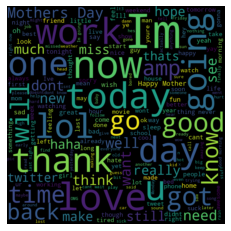

In [50]:
# plot wordcloud
all_words = ' '.join(df['content'])
word_cloud = WordCloud(height = 1000, width = 1000, random_state = 42, max_font_size = 220).generate(all_words)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# get subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['subjectivity'] = df['content'].apply(get_subjectivity)

df.head()

,tweet_id,sentiment,author,content,subjectivity
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier ...,0.583333
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,0.000000
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,0.000000
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,0.100000
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Housto...,0.000000


In [52]:
# get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['content'].apply(get_polarity)
df.head()

,tweet_id,sentiment,author,content,subjectivity,polarity
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier ...,0.583333,-0.35
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,0.000000,0.00
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,0.000000,0.00
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,0.100000,0.20
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Housto...,0.000000,0.00


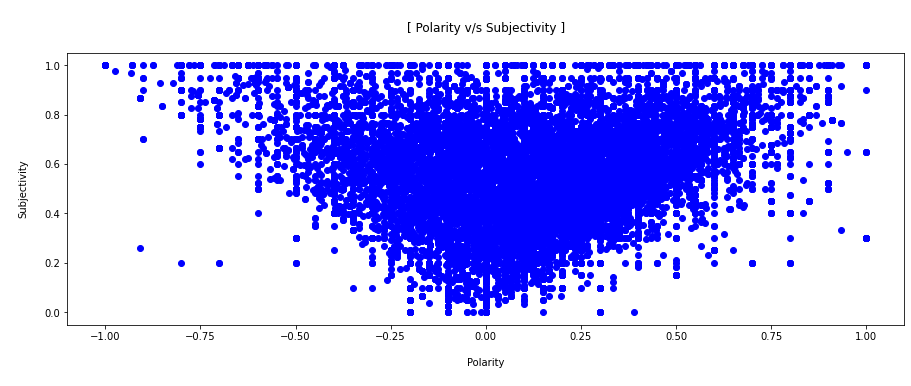

In [53]:
# plot scatter graph
plt.figure(figsize=(15,5))
plt.title("\n[ Polarity v/s Subjectivity ]\n")
plt.xlabel("\nPolarity\n")
plt.ylabel("\nSubjectivity\n")
plt.scatter(df['polarity'], df['subjectivity'], color='blue')
plt.show()

In [54]:
# mark sentiment as positive, negative and neutral
def get_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
    
df['analysis'] = df['polarity'].apply(get_sentiment)
df.head()

,tweet_id,sentiment,author,content,subjectivity,polarity,analysis
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier ...,0.583333,-0.35,negative
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhhwaitin on y...,0.000000,0.00,neutral
2,1956967696,sadness,coolfunky,Funeral ceremonygloomy friday,0.000000,0.00,neutral
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON,0.100000,0.20,positive
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Housto...,0.000000,0.00,neutral


In [62]:
# calculate positive, negative and neutral tweets percentage
values = df['analysis'].value_counts()
positive_tweet_percentage = round((values["positive"] / df['analysis'].shape[0]) * 100)
negative_tweet_percentage = round((values["negative"] / df['analysis'].shape[0]) * 100)
neutral_tweet_percentage = round((values["neutral"] / df['analysis'].shape[0]) * 100)

tweets_percentage = [positive_tweet_percentage, negative_tweet_percentage, neutral_tweet_percentage]
tweets_percentage

[44, 21, 35]

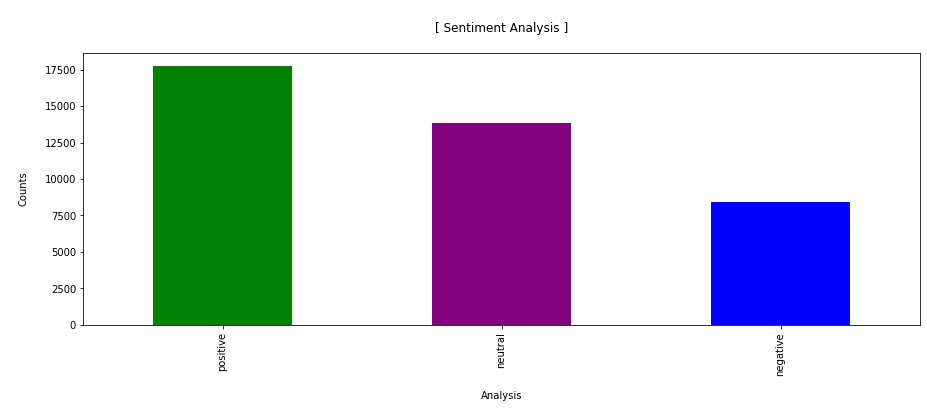

In [74]:
# plot bar graph of analysis
plt.figure(figsize=(15, 5))
plt.title("\n[ Sentiment Analysis ]\n")
plt.xlabel("\nAnalysis\n")
plt.ylabel("\nCounts\n")
df['analysis'].value_counts().plot(kind='bar', color=["Green", "Purple", "Blue"])
plt.show()